# Importing the Data

In [80]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [159]:
import warnings
warnings.filterwarnings('ignore')

In [161]:
data=pd.read_csv('train-data.csv')
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [162]:
data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [163]:
data.shape

(6019, 14)

In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [165]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


# Preprocessing the data set

In [166]:
data['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [167]:
data['Year'].value_counts()

2014    797
2015    744
2016    741
2013    649
2017    587
2012    580
2011    466
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

In [168]:
data['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [169]:
data['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [170]:
data = data.drop(['Unnamed: 0','New_Price'], axis=1)
data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


Checking for the null values

In [171]:
data.isna().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

# Data Cleaning:

In [172]:
data['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [174]:
drop_lpg= data[data['Fuel_Type']=='LPG'].index
drop_cng= data[data['Fuel_Type']=='CNG'].index
drop_ele= data[data['Fuel_Type']=='Electric'].index


In [175]:
index_of_all_drops=[]  
                                              # Here, I have drop the records that have less impact in fuel types.
index_of_all_drops.extend(drop_lpg)
index_of_all_drops.extend(drop_cng)
index_of_all_drops.extend(drop_ele)

data.drop(labels = index_of_all_drops, axis=0,inplace= True)

In [176]:
data['Fuel_Type'].value_counts()

Diesel    3205
Petrol    2746
Name: Fuel_Type, dtype: int64

In [177]:
data= pd.get_dummies(data, columns=['Fuel_Type'])
data.head()

,Name,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1,0
2,Honda Jazz V,Chennai,2011,46000,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,1,0


In [178]:
data['Transmission'].value_counts()

Manual       4233
Automatic    1718
Name: Transmission, dtype: int64

In [179]:
data= pd.get_dummies(data, columns=['Transmission'])
data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,0,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,1,0,0,1


In [180]:
data.replace({"Owner_Type":{"First":1,"Second":2,"Third":3,"Fourth & Above":4}},inplace=True)

In [181]:
data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000,1,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,0,1,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,1,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,1,0,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,1,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50,1,0,0,1


In [182]:
data.dtypes

Name                       object
Location                   object
Year                        int64
Kilometers_Driven           int64
Owner_Type                  int64
Mileage                    object
Engine                     object
Power                      object
Seats                     float64
Price                     float64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Transmission_Automatic      uint8
Transmission_Manual         uint8
dtype: object

.Dealing with Mileage,Engine,Power

In [183]:
data['Mileage'].value_counts()

17.0 kmpl     172
18.9 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
17.16 kmpl      1
18.23 kmpl      1
14.9 kmpl       1
13.29 kmpl      1
17.24 kmpl      1
Name: Mileage, Length: 418, dtype: int64

In [184]:
data['Mileage']= data['Mileage'].str.split(' ').str.get(0)

In [185]:
data['Engine'].value_counts()

1197 CC    604
1248 CC    512
1498 CC    304
2179 CC    240
1497 CC    229
          ... 
2999 CC      1
2694 CC      1
2147 CC      1
3200 CC      1
1797 CC      1
Name: Engine, Length: 145, dtype: int64

In [186]:
data['Engine'] = data['Engine'].str.split(' ').str.get(0)
data['Power'] = data['Power'].str.split(' ').str.get(0)

In [187]:
data.dtypes

Name                       object
Location                   object
Year                        int64
Kilometers_Driven           int64
Owner_Type                  int64
Mileage                    object
Engine                     object
Power                      object
Seats                     float64
Price                     float64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Transmission_Automatic      uint8
Transmission_Manual         uint8
dtype: object

In [188]:
data

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,1,19.67,1582,126.2,5.0,12.50,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000,1,18.2,1199,88.7,5.0,4.50,0,1,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,1,20.77,1248,88.76,7.0,6.00,1,0,0,1
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,2,15.2,1968,140.8,5.0,17.74,1,0,1,0
6,Nissan Micra Diesel XV,Jaipur,2013,86999,1,23.08,1461,63.1,5.0,3.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,1,28.4,1248,74,5.0,4.75,1,0,0,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,24.4,1120,71,5.0,4.00,1,0,0,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,14.0,2498,112,8.0,2.90,1,0,0,1
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,18.9,998,67.1,5.0,2.65,0,1,0,1


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5951 entries, 1 to 6018
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    5951 non-null   object 
 1   Location                5951 non-null   object 
 2   Year                    5951 non-null   int64  
 3   Kilometers_Driven       5951 non-null   int64  
 4   Owner_Type              5951 non-null   int64  
 5   Mileage                 5951 non-null   object 
 6   Engine                  5915 non-null   object 
 7   Power                   5915 non-null   object 
 8   Seats                   5909 non-null   float64
 9   Price                   5951 non-null   float64
 10  Fuel_Type_Diesel        5951 non-null   uint8  
 11  Fuel_Type_Petrol        5951 non-null   uint8  
 12  Transmission_Automatic  5951 non-null   uint8  
 13  Transmission_Manual     5951 non-null   uint8  
dtypes: float64(2), int64(3), object(5), uint

In [190]:
data.dtypes

Name                       object
Location                   object
Year                        int64
Kilometers_Driven           int64
Owner_Type                  int64
Mileage                    object
Engine                     object
Power                      object
Seats                     float64
Price                     float64
Fuel_Type_Diesel            uint8
Fuel_Type_Petrol            uint8
Transmission_Automatic      uint8
Transmission_Manual         uint8
dtype: object

In [191]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
6014,Maruti Swift VDI,Delhi,2014,27365,1,28.4,1248,74,5.0,4.75,1,0,0,1
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,1,24.4,1120,71,5.0,4.00,1,0,0,1
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,2,14.0,2498,112,8.0,2.90,1,0,0,1
6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,18.9,998,67.1,5.0,2.65,0,1,0,1
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,1,25.44,936,57.6,5.0,2.50,1,0,0,1


In [192]:
data.isna().sum()

Name                       0
Location                   0
Year                       0
Kilometers_Driven          0
Owner_Type                 0
Mileage                    0
Engine                    36
Power                     36
Seats                     42
Price                      0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Transmission_Automatic     0
Transmission_Manual        0
dtype: int64

In [193]:
from sklearn.impute import SimpleImputer

In [194]:
mf_imputer= SimpleImputer(strategy='most_frequent')
data['Seats'] = mf_imputer.fit_transform(data[['Seats']])

In [195]:
data['Engine'] = data['Engine'].fillna(0)
data['Power'] = data['Power'].fillna(0)

In [196]:
data=data.replace('null', 0)

In [200]:
mean_imputer= SimpleImputer(strategy='mean')
data['Engine'] = mean_imputer.fit_transform(data[['Engine']])

In [198]:
m_imputer= SimpleImputer(strategy='mean')
data['Power'] = m_imputer.fit_transform(data[['Power']])

In [201]:
# Since the name of car is long, so we areonly taking the first 3 words only.
data['Name']= data['Name'].str.split(' ').str.slice(0,3).str.join(' ')

In [202]:
data.isna().sum()

Name                      0
Location                  0
Year                      0
Kilometers_Driven         0
Owner_Type                0
Mileage                   0
Engine                    0
Power                     0
Seats                     0
Price                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Transmission_Automatic    0
Transmission_Manual       0
dtype: int64

In [203]:
data.head()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
1,Hyundai Creta 1.6,Pune,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,1,0,0,1
2,Honda Jazz V,Chennai,2011,46000,1,18.2,1199.0,88.70,5.0,4.50,0,1,0,1
3,Maruti Ertiga VDI,Chennai,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,1,0,0,1
4,Audi A4 New,Coimbatore,2013,40670,2,15.2,1968.0,140.80,5.0,17.74,1,0,1,0
6,Nissan Micra Diesel,Jaipur,2013,86999,1,23.08,1461.0,63.10,5.0,3.50,1,0,0,1


# Visualizing the Dataset

In [204]:
data.corr()

,Year,Kilometers_Driven,Owner_Type,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
Year,1.000000,-0.172610,-0.397224,-0.030173,0.085546,0.015233,0.306567,0.128111,-0.128111,0.098019,-0.098019
Kilometers_Driven,-0.172610,1.000000,0.084943,0.087724,0.022611,0.083002,-0.011535,0.104774,-0.104774,-0.025872,0.025872
Owner_Type,-0.397224,0.084943,1.000000,0.039362,-0.007231,0.013438,-0.097649,-0.045816,0.045816,-0.008489,0.008489
Engine,-0.030173,0.087724,0.039362,1.000000,0.843656,0.389223,0.646489,0.421952,-0.421952,0.489197,-0.489197
Power,0.085546,0.022611,-0.007231,0.843656,1.000000,0.108819,0.751363,0.283973,-0.283973,0.625369,-0.625369
Seats,0.015233,0.083002,0.013438,0.389223,0.108819,1.000000,0.050630,0.308164,-0.308164,-0.077261,0.077261
Price,0.306567,-0.011535,-0.097649,0.646489,0.751363,0.050630,1.000000,0.316903,-0.316903,0.584598,-0.584598
Fuel_Type_Diesel,0.128111,0.104774,-0.045816,0.421952,0.283973,0.308164,0.316903,1.000000,-1.000000,0.135937,-0.135937
Fuel_Type_Petrol,-0.128111,-0.104774,0.045816,-0.421952,-0.283973,-0.308164,-0.316903,-1.000000,1.000000,-0.135937,0.135937
Transmission_Automatic,0.098019,-0.025872,-0.008489,0.489197,0.625369,-0.077261,0.584598,0.135937,-0.135937,1.000000,-1.000000


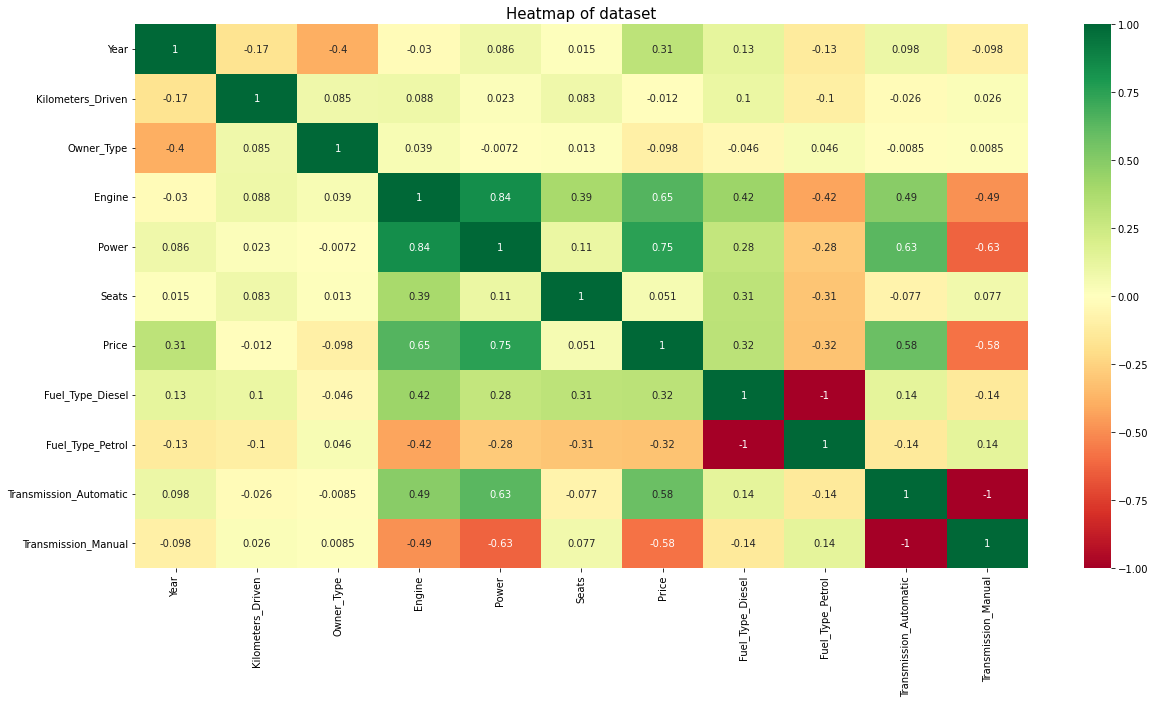

In [205]:
plt.figure(figsize=(20,10))
title='Heatmap of dataset'
plt.title(title, fontsize=15)
sns.heatmap(data.corr(), annot= True, cmap='RdYlGn')
plt.savefig('correlation.jpeg')
plt.show()


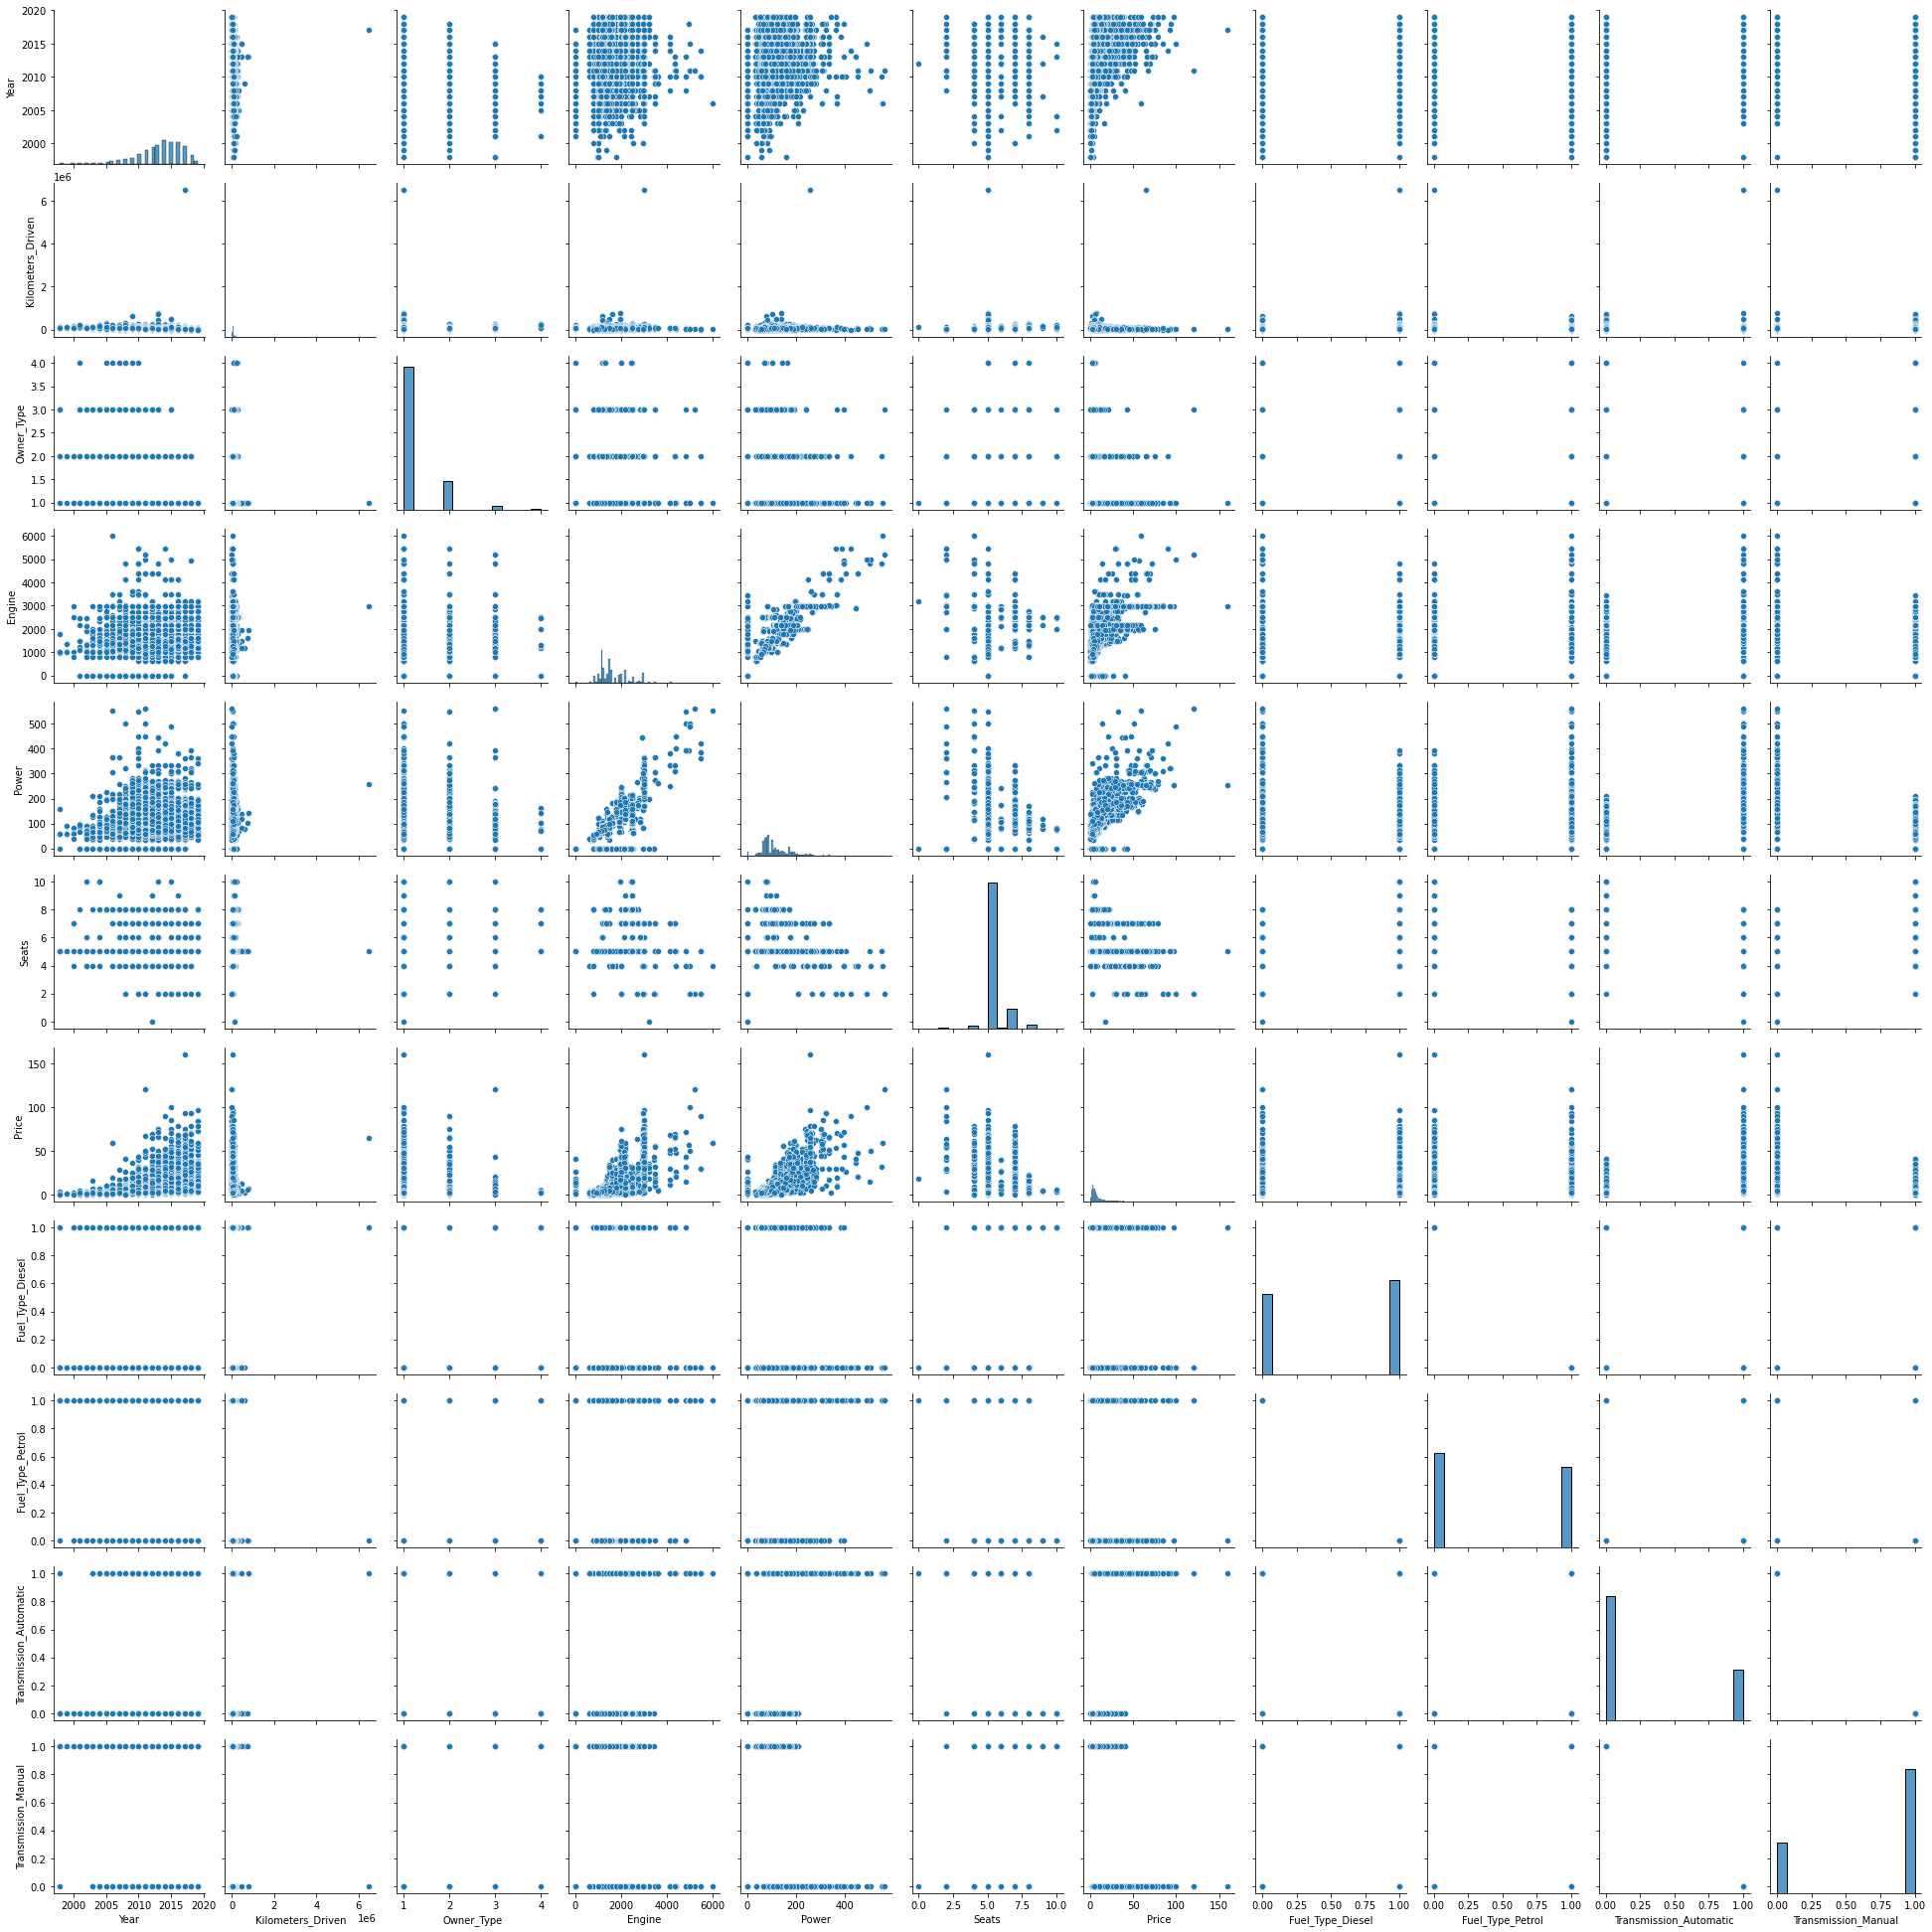

In [206]:
sns.pairplot(data)
plt.savefig('pairplot.jpeg')

In [207]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

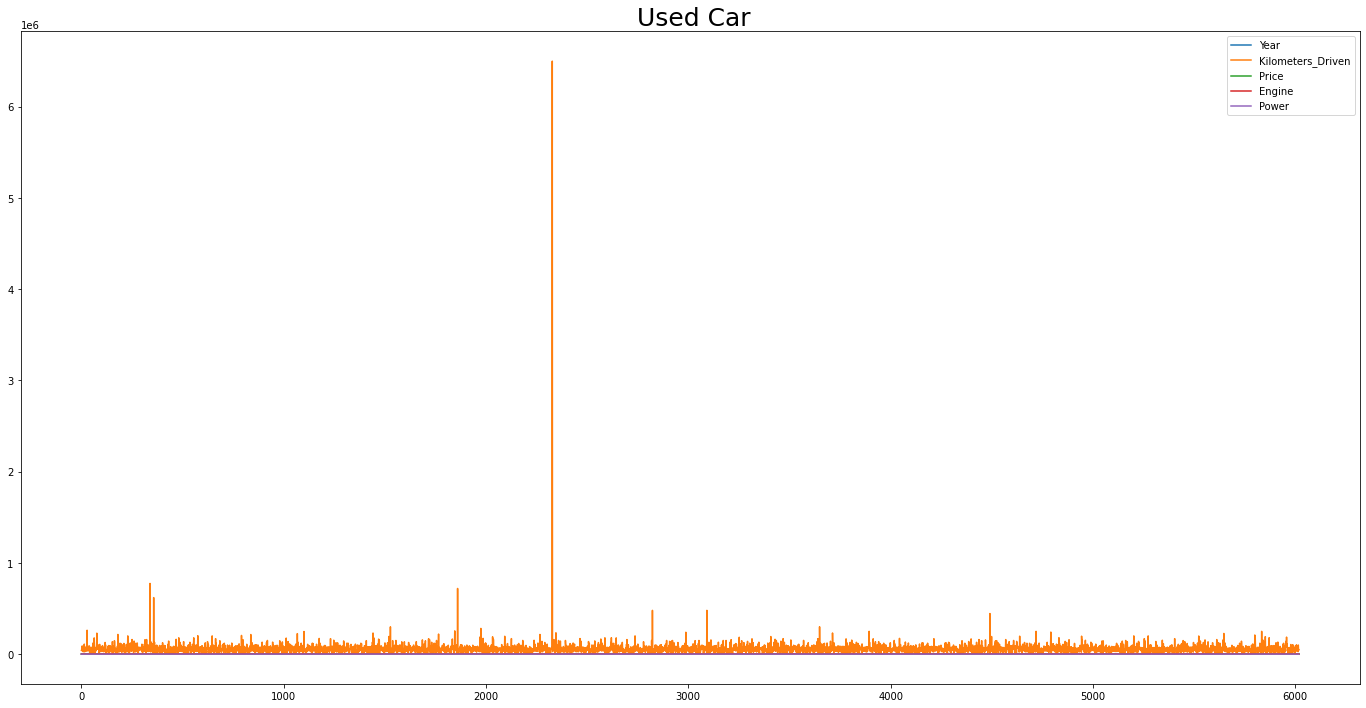

In [208]:
data[['Year','Kilometers_Driven','Price','Engine','Power']].plot(figsize=(24,12))
plt.title(' Used Car', fontsize=25)
plt.savefig('car.jpeg')

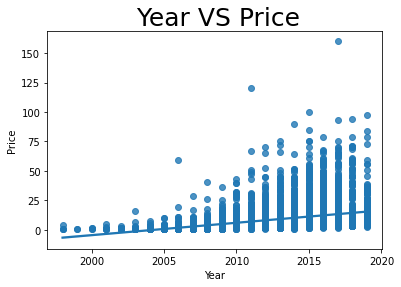

In [209]:
sns.regplot(x='Year', y='Price', data=data)
plt.title(' Year VS Price', fontsize=25)
plt.savefig('reg.jpeg')

<AxesSubplot:title={'center':' BOxplot'}, xlabel='Year', ylabel='Price'>

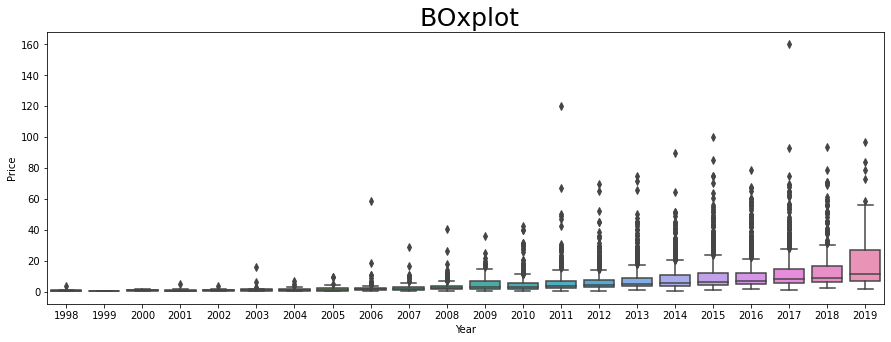

In [210]:
plt.figure(figsize=(15,5))
plt.title(' BOxplot', fontsize=25)
plt.savefig('bobplot.jpeg')
sns.boxplot(x='Year',y='Price',data=data)

<AxesSubplot:title={'center':' BOxplot of Year and Engine'}, xlabel='Year', ylabel='Engine'>

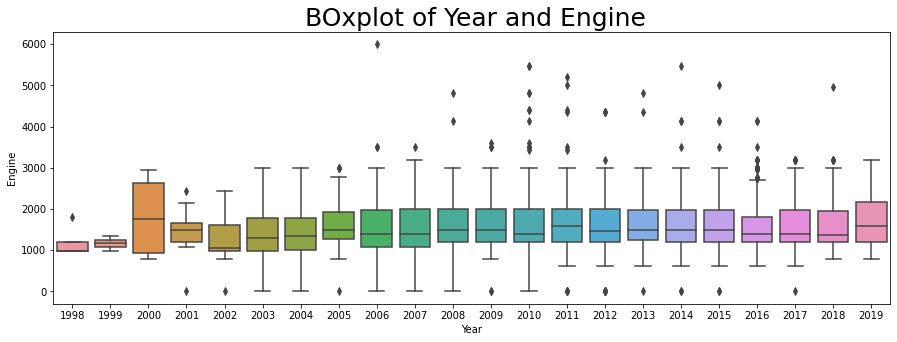

In [211]:
plt.figure(figsize=(15,5))
plt.title(' BOxplot of Year and Engine', fontsize=25)
plt.savefig('engine.jpeg')
sns.boxplot(x='Year',y='Engine',data=data)

<AxesSubplot:xlabel='Year', ylabel='Mileage'>

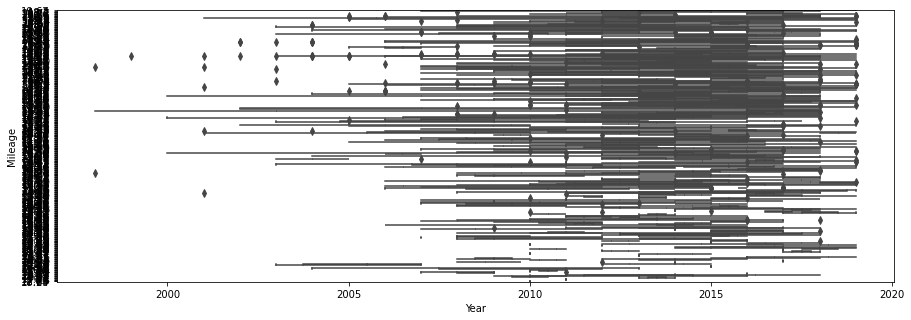

In [212]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year',y='Mileage',data=data)

<AxesSubplot:xlabel='Year', ylabel='Location'>

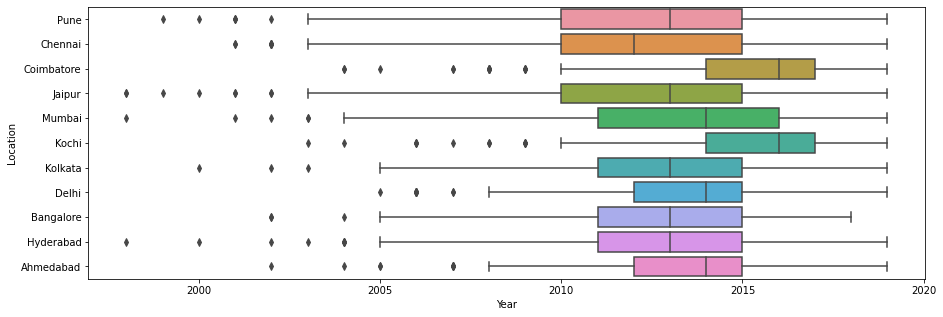

In [213]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Year',y='Location',data=data)

Text(0, 0.5, 'Price')

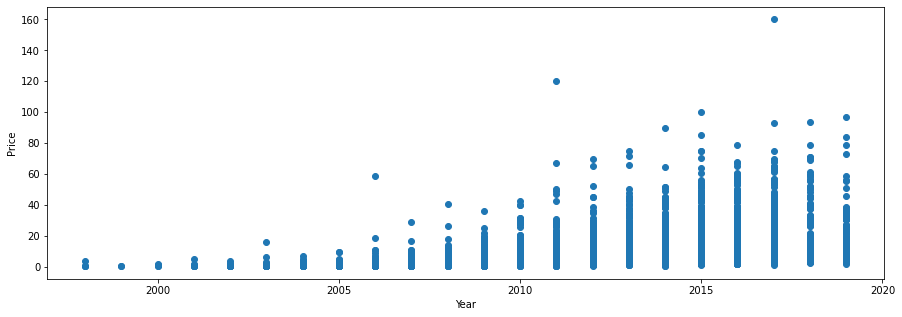

In [214]:
plt.figure(figsize=(15,5))
plt.scatter(x='Year',y='Price',data=data)
plt.xlabel("Year")
plt.ylabel("Price")

In [215]:
data.tail()

,Name,Location,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
6014,Maruti Swift VDI,Delhi,2014,27365,1,28.4,1248.0,74.0,5.0,4.75,1,0,0,1
6015,Hyundai Xcent 1.1,Jaipur,2015,100000,1,24.4,1120.0,71.0,5.0,4.00,1,0,0,1
6016,Mahindra Xylo D4,Jaipur,2012,55000,2,14.0,2498.0,112.0,8.0,2.90,1,0,0,1
6017,Maruti Wagon R,Kolkata,2013,46000,1,18.9,998.0,67.1,5.0,2.65,0,1,0,1
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,1,25.44,936.0,57.6,5.0,2.50,1,0,0,1


Text(0.5, 1.0, 'Correlation of columns')

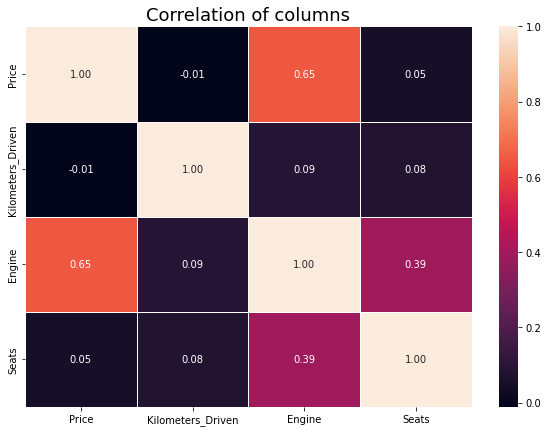

In [216]:
plt.figure(figsize=(10,7))
sns.heatmap(data[["Price","Kilometers_Driven","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation of columns",size=18)

In [217]:
data = data.drop(['Name','Location'], axis=1)
data

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
1,2015,41000,1,19.67,1582.0,126.20,5.0,12.50,1,0,0,1
2,2011,46000,1,18.2,1199.0,88.70,5.0,4.50,0,1,0,1
3,2012,87000,1,20.77,1248.0,88.76,7.0,6.00,1,0,0,1
4,2013,40670,2,15.2,1968.0,140.80,5.0,17.74,1,0,1,0
6,2013,86999,1,23.08,1461.0,63.10,5.0,3.50,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,1,28.4,1248.0,74.00,5.0,4.75,1,0,0,1
6015,2015,100000,1,24.4,1120.0,71.00,5.0,4.00,1,0,0,1
6016,2012,55000,2,14.0,2498.0,112.00,8.0,2.90,1,0,0,1
6017,2013,46000,1,18.9,998.0,67.10,5.0,2.65,0,1,0,1


In [218]:
data=data.replace('null', 0)

# Using the model


In [219]:
y = data.Price
x = data.drop('Price', axis = 1)

In [220]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.3, random_state=32)
xtrain

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual
956,2012,71000,1,23.0,1396.0,90.00,5.0,1,0,0,1
5239,2013,72000,1,14.16,1968.0,174.30,5.0,1,0,1,0
2097,2013,85000,1,16.1,1950.0,194.00,5.0,1,0,1,0
5901,2014,59000,1,22.7,1498.0,89.84,5.0,1,0,0,1
4268,2011,120000,2,22.9,1248.0,74.00,5.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4079,2017,25000,1,13.33,2993.0,255.00,5.0,1,0,1,0
2974,2014,75136,1,22.7,1498.0,89.84,5.0,1,0,0,1
1348,2011,87670,1,13.4,1798.0,157.80,5.0,0,1,0,1
1595,2014,47303,1,19.34,1198.0,76.00,5.0,0,1,1,0


In [221]:
xtrain.shape

(4165, 11)

In [222]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# model=LinearRegression()

In [223]:
lr=LinearRegression()

In [224]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [225]:
list(zip(xtest.columns,lr.coef_.flatten()))

[('Year', 1.0214653303765187),
 ('Kilometers_Driven', 2.1016451082038233e-06),
 ('Owner_Type', -0.0015966807740183733),
 ('Mileage', -0.4543121371450538),
 ('Engine', 0.0007885778596731819),
 ('Power', 0.10030040385771716),
 ('Seats', -1.6665842487301996),
 ('Fuel_Type_Diesel', 1.8534130844305876),
 ('Fuel_Type_Petrol', -1.8534130844305865),
 ('Transmission_Automatic', 1.6135361923307643),
 ('Transmission_Manual', -1.6135361923307656)]

([<matplotlib.axis.XTick at 0x17727cd6850>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

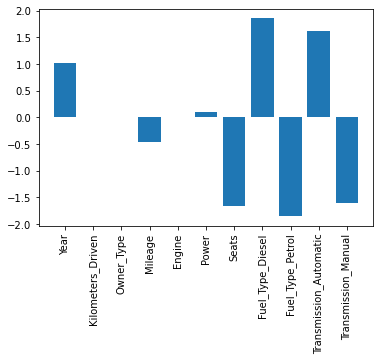

In [226]:
plt.bar(xtest.columns,lr.coef_.flatten())
plt.xticks(xtest.columns,rotation=90)

In [227]:
lr.intercept_

-2042.0142697434894

In [229]:
yhat=lr.predict(xtest)
yhat

array([0.63886478, 3.23438844, 9.12799048, ..., 9.29967184, 3.27637971,
       5.75297037])

In [231]:
list(zip(yhat,ytest))

[(0.6388647809646955, 3.38),
 (3.2343884407998758, 3.71),
 (9.127990478472384, 5.75),
 (7.210695956372092, 6.59),
 (4.717917847749959, 6.5),
 (-6.2519674696618495, 1.2),
 (2.817796868928781, 3.1),
 (5.3838878840547295, 2.74),
 (4.121334086305978, 4.06),
 (8.343049910607988, 7.97),
 (-0.551542377102578, 3.25),
 (5.308165736400042, 2.95),
 (11.577872443786418, 9.47),
 (25.383593653998105, 25.71),
 (6.760766598397822, 4.75),
 (-2.771951173797788, 2.05),
 (6.0079891801538, 4.94),
 (2.054945271868746, 3.0),
 (18.699143246946733, 10.0),
 (14.203370281692969, 10.49),
 (2.323132478846901, 2.95),
 (1.146623761525234, 2.75),
 (21.438454839111728, 22.95),
 (7.956994831513839, 9.51),
 (-8.610359329534731, 2.5),
 (4.129325795962359, 4.87),
 (-3.3030403617242428, 1.75),
 (2.484162318136441, 3.25),
 (7.325620927102591, 4.02),
 (3.181776260937113, 4.4),
 (15.835127299759733, 17.92),
 (5.302146707007978, 6.55),
 (0.3777808899212687, 2.3),
 (18.783640763861513, 23.0),
 (16.2919487613608, 13.95),
 (29.29

In [232]:
mean_absolute_error(yhat, ytest)

3.861415532106865

In [233]:
mean_squared_error(yhat, ytest)


36.515603036580934

In [234]:
r2_score(yhat, ytest)

0.5644617958813027

In [235]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

In [236]:
mean_squared_error(yhat, ytest)

36.515603036580934

In [237]:
regression_models = [lr,rfr,dtr]
score_train = list()
score_test = list()

for model in regression_models : 
    model.fit(xtrain,ytrain)
    y_pred = model.predict(xtest)
    
    score_train.append(model.score(xtrain,ytrain))
    score_test.append(model.score(xtest,ytest))

In [238]:
model_names = ['Linear Regression','Random Forest Regressor','Decision Tree Regressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1,2
0,Linear Regression,Random Forest Regressor,Decision Tree Regressor
1,0.661799,0.980126,0.999922
2,0.691442,0.88684,0.785762


In [239]:
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.661799,0.691442
1,Random Forest Regressor,0.980126,0.88684
2,Decision Tree Regressor,0.999922,0.785762


Text(0, 0.5, 'Trainig Set Accuracy')

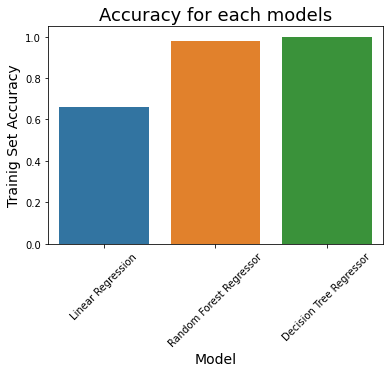

In [240]:
sns.barplot(data=scores, x='Model', y='Training Set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Trainig Set Accuracy',size=14)

Text(0, 0.5, 'Testing Set Accuracy')

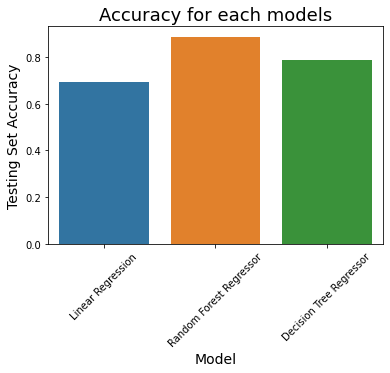

In [241]:
sns.barplot(data=scores, x='Model', y='Testing set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Testing Set Accuracy',size=14)

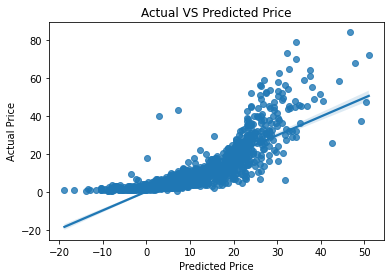

In [242]:
sns.regplot(x=yhat, y=ytest)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Actual VS Predicted Price')
plt.show()